### Import libraries

In [320]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [342]:
# adjust default options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

### Define viral growth function

In [322]:
# create function for calculating number of users given inputs
def user_growth(user_base, viral_coeff, cycle_time, time_elapsed):
    output = user_base*((viral_coeff ** ((time_elapsed/cycle_time) + 1) - 1)/(viral_coeff - 1))
    return output

In [323]:
# create array for x-values (time)
t = np.arange(0, 100, 1)
# t

### Create user base vs. time for several (k, c) cases

In [324]:
# create arrays for several cases
users_k0p5_c10 = []
users_k1_c10 = []
users_k2_c10 = []
users_k2_c5 = []
users_k2_c15 = []
for i in t:
    users_k0p5_c10.append(user_growth(1, 0.5, 10, i))
    users_k1_c10.append(user_growth(1, 1.001, 10, i))    
    users_k2_c10.append(user_growth(1, 2, 10, i))
    users_k2_c5.append(user_growth(1, 2, 5, i))
    users_k2_c15.append(user_growth(1, 2, 15, i))

In [325]:
# compile data into dataframe
viral_growth = pd.DataFrame({'time (days)': t,
                             'k0.5, c10': users_k0p5_c10,
                             'k1, c10': users_k1_c10,
                             'k2, c10': users_k2_c10,
                             'k2, c5': users_k2_c5,
                             'k2, c15': users_k2_c15})

# viral_growth.style.hide_index()

### Visualize users vs. time for selected values of k and c

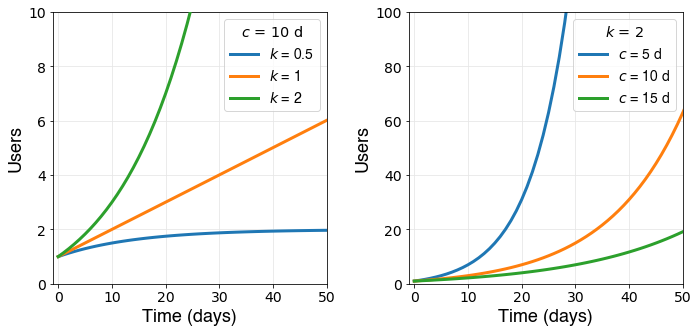

In [326]:
# plot result
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# stipulate data of interest
x = viral_growth['time (days)']
y1 = viral_growth['k0.5, c10']
y2 = viral_growth['k1, c10']
y3 = viral_growth['k2, c10']
y4 = viral_growth['k2, c5']
y5 = viral_growth['k2, c15']

# plot k variation
axes[0].plot(x, y1, linewidth=3, zorder= 1, label='$k$ = 0.5')
axes[0].plot(x, y2, linewidth=3, zorder= 3, label='$k$ = 1')
axes[0].plot(x, y3, linewidth=3, zorder= 5, label='$k$ = 2')

# set limits
axes[0].set_xlim(-1, 50)
axes[0].set_ylim(0, 10)
axes[0].set_yticks(np.arange(0, 11, 2))

# set legend, plot properties
l = axes[0].legend(prop={'size': 14}, title='$c$ = 10 d')
plt.setp(l.texts, family='Helvetica')
plt.setp(l.get_title(),fontsize='x-large')

axes[0].set_xlabel('Time (days)', fontsize=18, fontname='Helvetica')
axes[0].set_ylabel('Users', fontsize=18, fontname='Helvetica')
axes[0].tick_params(axis = 'x', labelsize = 14)
axes[0].tick_params(axis = 'y', labelsize = 14)
axes[0].grid(color=(.9, .9, .9)); axes[0].set_axisbelow(True)

# plot c variation
axes[1].plot(x, y4, linewidth=3, zorder= 1, label='$c$ = 5 d')
axes[1].plot(x, y3, linewidth=3, zorder= 3, label='$c$ = 10 d')
axes[1].plot(x, y5, linewidth=3, zorder= 5, label='$c$ = 15 d')

# set limits
axes[1].set_xlim(-1, 50)
axes[1].set_ylim(0, 100)
axes[1].set_yticks(np.arange(0, 101, 20))

# set legend, plot properties
l2 = axes[1].legend(prop={'size': 14}, title='$k$ = 2')
plt.setp(l2.texts, family='Helvetica')
plt.setp(l2.get_title(),fontsize='x-large')

axes[1].set_xlabel('Time (days)', fontsize=18, fontname='Helvetica')
axes[1].set_ylabel('Users', fontsize=18, fontname='Helvetica')
axes[1].tick_params(axis = 'x', labelsize = 14)
axes[1].tick_params(axis = 'y', labelsize = 14)
axes[1].grid(color=(.9, .9, .9)); axes[1].set_axisbelow(True)

# save, display plot
plt.subplots_adjust(wspace=0.3, left=0.075, right=0.95)
plt.savefig('./Images/viral_growth_k_c.png', dpi=400)
plt.show()

### Create active user definition table

In [327]:
# create active user definition table
active_user_defs = pd.DataFrame({'Company': ['Facebook', 'Twitter', 'Uber', 'Amazon', 'Square'],
#                                  'Revenue source': ['Advertising', 'Advertising', 'Commissions', 'Commissions', 'Commissions'],
                                 'Active user action': ['Liking, commenting, messaging, etc.', 
                                            'Logging in',
                                            'Receiving a ride or meal delivery',
                                            'Making a purchase',
                                            'Sending or receiving money'],
                                 'Time interval': ['Daily', 'Daily', 'Monthly', 'Yearly', 'Monthly'],
                                 'Count (millions, 2020)': ['1,734', '166', '111', '310', '24']})
active_user_defs.style.hide_index()

Company,Active user action,Time interval,"Count (millions, 2020)"
Facebook,"Liking, commenting, messaging, etc.",Daily,"1,734"
Twitter,Logging in,Daily,166
Uber,Receiving a ride or meal delivery,Monthly,111
Amazon,Making a purchase,Yearly,310
Square,Sending or receiving money,Monthly,24


### Simulate users vs. time with viral growth + retention/churn

In [328]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
# colors

In [517]:
# create x-axis (time, days)
x = np.arange(0,1000,1)

# create viral coefficient data
min_k = 0.5
max_k = 2.0
width = 250
center = 500
viral_coeff = (max_k - min_k)*np.exp(-((x - center) / width)**2) + min_k
# viral_coeff = np.ones(len(x))*0.5 # constant, low viral coefficient

# create cycle time data
decay_rate = 0.005
start_cycle_time = 20
end_cycle_time = 5
cycle_time = (start_cycle_time - end_cycle_time)*np.exp(-x*decay_rate) + end_cycle_time
# cycle_time = np.ones(len(x))*20 # constant, long cycle time

# create retention rate change data
decay_rate = 0.005
end_retention = 0.6
retention_rate =  -end_retention*np.exp(-x*decay_rate-0.25) + end_retention
# retention_rate = np.ones(len(x))*0.15 # constant, low retention rate

# create resurrection rate change data 
decay_rate = 0.005
end_resurrection = 0.01
resurrection_rate =  -end_resurrection*np.exp(-x*decay_rate-0.225) + end_resurrection
# resurrection_rate = np.ones(len(x))*0.002 # constant, low resurrection rate

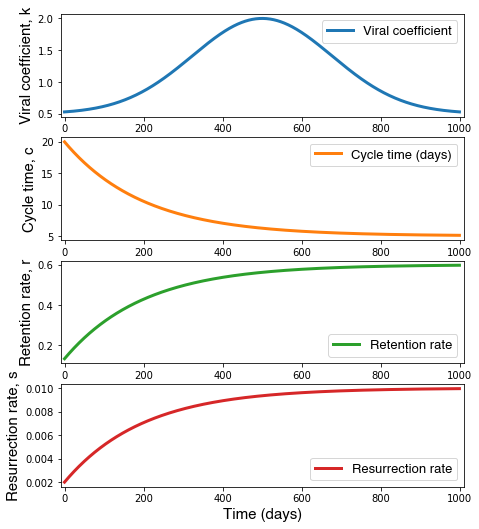

In [518]:
# create plots illustrating plausible changes to k, c, and r over time

fig, axes = plt.subplots(4, 1, figsize = (7,9))
axes[0].plot(x, viral_coeff, linewidth=3, c=colors[0], label='Viral coefficient')
axes[0].legend(prop={'size': 13, 'family':'Helvetica'})
axes[0].set_xlim(-10,1010)
axes[0].set_ylabel('Viral coefficient, k', size=15, fontname='Helvetica', fontweight='bold')

axes[1].plot(x, cycle_time, linewidth=3, c=colors[1], label='Cycle time (days)')
axes[1].legend(prop={'size': 13, 'family':'Helvetica'})
axes[1].set_xlim(-10,1010)
axes[1].set_ylabel('Cycle time, c', size=15, fontname='Helvetica', fontweight='bold')

axes[2].plot(x, retention_rate, linewidth=3, c=colors[2], label='Retention rate')
axes[2].legend(prop={'size': 13, 'family':'Helvetica'})
axes[2].set_xlim(-10,1010)
axes[2].set_ylabel('Retention rate, r', size=15, fontname='Helvetica', fontweight='bold')

axes[3].plot(x, resurrection_rate, linewidth=3, c=colors[3], label='Resurrection rate')
axes[3].legend(prop={'size': 13, 'family':'Helvetica'})
axes[3].set_xlim(-10,1010)
axes[3].set_ylabel('Resurrection rate, s', size=15, fontname='Helvetica', fontweight='bold')

plt.xlabel('Time (days)', fontsize = 15, fontname = 'Helvetica', fontweight = 'bold')

figure_name = './Images/growth_inputs_1.png' 
plt.subplots_adjust(wspace = 0.35)
plt.gcf().subplots_adjust(bottom=0.15, left=0.1)
plt.savefig(figure_name, dpi = 400)
plt.show()

### Calculating user base vs. time

In [519]:
# gather inputs for user growth
growth_input = pd.DataFrame({'Viral coefficient': viral_coeff, 
                             'Cycle time': cycle_time, 
                             'Retention rate': retention_rate,
                             'Resurrection rate': resurrection_rate})

**New users** at time $t$ is equal to product of new users, retention rate, and viral coefficient from one cycle ago, plus "free" users who discover product independently: 
<br><br>
$U_{new}(t) = U_{new}(t-c(t)) \times r(t-c(t)) \times k(t-c(t)) \space + U_{free}(t)$
<br><br>
(assumes invites only come from retained users)
<br><br><br>
**Total active users** at time $t$ is equal to active users from previous interval, plus previous interval's new users times retention rate, plus previous interval's lost users times resurrection rate:
<br><br>
$U_{active}(t) = U_{active}(t-1) + U_{new}(t-1) \times r(t-1) + U_{lost}(t-1) \times s(t-1)$
<br><br>
(assumes entire churn happens after first day)
<br><br><br>
**Total lost users** at time $t$ is equal to lost users from previous interval plus product of previous interval's new users and churn rate:
<br><br>
$U_{lost}(t) = U_{lost}(t-1) + U_{new}(t-1) \times (1 - r(t-1))$

In [520]:
# create growth table 
starting_users = 10
free_users = 10

growth_output = pd.DataFrame({'New': starting_users,
                              'Active': 0,
                              'Lost': 0}, 
                               index=[0])

for index, row in growth_input.iterrows():
    
    cycle_time_int = int(round(growth_input['Cycle time'].iloc[index], 0))

    if len(growth_output) >= cycle_time_int:
        growth_output_temp = pd.DataFrame({'New': int(free_users + growth_output['New'].iloc[index-cycle_time_int] * growth_input['Retention rate'].iloc[index-cycle_time_int] * growth_input['Viral coefficient'].iloc[index-cycle_time_int]),
                                           'Active': round(growth_output['Active'].iloc[index] + growth_output['New'].iloc[index]*growth_input['Retention rate'].iloc[index] + growth_output['Lost'].iloc[index]*growth_input['Resurrection rate'].iloc[index], 0),
                                           'Lost': round(growth_output['Lost'].iloc[index] + growth_output['New'].iloc[index]*(1 - growth_input['Retention rate'].iloc[index]), 0)}, 
                                            index=[index+1])

    else:
        growth_output_temp = pd.DataFrame({'New': free_users,
                                           'Active': round(growth_output['Active'].iloc[index] + growth_output['New'].iloc[index]*growth_input['Retention rate'].iloc[index] + growth_output['Lost'].iloc[index]*growth_input['Resurrection rate'].iloc[index], 0),
                                           'Lost': round(growth_output['Lost'].iloc[index] + growth_output['New'].iloc[index]*(1 - growth_input['Retention rate'].iloc[index]), 0)}, 
                                            index=[index+1])
        
    growth_output = growth_output.append(growth_output_temp)

growth = pd.concat([growth_input, growth_output], axis=1)

In [521]:
# check result
# growth[400:425]
# growth[20:40]
# growth[40:65]
# growth[65:90]
# growth[500:520]
growth.iloc[-1]

# terminal user count
# ideal: 554266
# k = 0.5: 36587
# c = 20: 151796
# r = 0.15: 46115
# s = 0.002: 223836
# Ufree = 0: 1
# Ufree = 1: 24424

# (best to worst)
# ideal (550k), low resurrection (224k), high cycle time (152k), low retention (46k), low viral coefficient (37k), low free users (24k)

Viral coefficient          nan
Cycle time                 nan
Retention rate             nan
Resurrection rate          nan
New                     14.000
Active              554266.000
Lost                103887.000
Name: 1000, dtype: float64

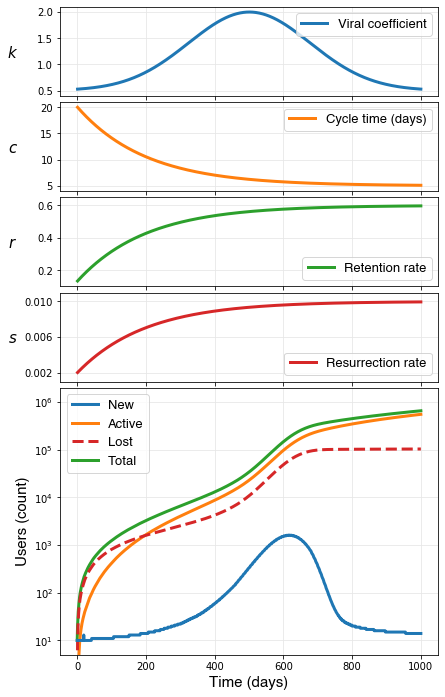

In [522]:
# plot user growth 

# inputs
fig, axes = plt.subplots(5, 1, figsize = (7,10), gridspec_kw={'height_ratios': [1, 1, 1, 1, 3]})
x = growth.index

axes[0].plot(x[1:], viral_coeff, linewidth=3, c=colors[0], label='Viral coefficient')
axes[0].legend(loc=1, prop={'size': 13, 'family':'Helvetica'})
axes[0].set_xlim(-50,1050)
axes[0].set_ylim(0.4,2.1)
axes[0].set_yticks([0.5, 1.0, 1.5, 2])
axes[0].set_ylabel(r'$k$', size=15, fontname='Helvetica', fontweight='bold', rotation=0)
axes[0].axes.xaxis.set_ticklabels([])
axes[0].get_yaxis().set_label_coords(-0.125,0.4)

axes[1].plot(x[1:], cycle_time, linewidth=3, c=colors[1], label='Cycle time (days)')
axes[1].legend(loc=1, prop={'size': 13, 'family':'Helvetica'})
axes[1].set_xlim(-50,1050)
axes[1].set_ylim(4,21)
axes[1].set_ylabel(r'$c$', size=15, fontname='Helvetica', fontweight='bold', rotation=0)
axes[1].axes.xaxis.set_ticklabels([])
axes[1].set_yticks([5, 10, 15, 20])
axes[1].get_yaxis().set_label_coords(-0.125,0.4)

axes[2].plot(x[1:], retention_rate, linewidth=3, c=colors[2], label='Retention rate')
axes[2].legend(prop={'size': 13, 'family':'Helvetica'})
axes[2].set_xlim(-50,1050)
axes[2].set_ylim(0.10,0.65)
axes[2].set_ylabel(r'$r$', size=15, fontname='Helvetica', fontweight='bold', rotation=0)
axes[2].axes.xaxis.set_ticklabels([])
axes[2].set_yticks([0.2, 0.4, 0.6])
axes[2].get_yaxis().set_label_coords(-0.125,0.4)

axes[3].plot(x[1:], resurrection_rate, linewidth=3, c=colors[3], label='Resurrection rate')
axes[3].legend(prop={'size': 13, 'family':'Helvetica'})
axes[3].set_xlim(-50,1050)
axes[3].set_ylim(0.001,0.011)
axes[3].set_ylabel(r'$s$', size=15, fontname='Helvetica', fontweight='bold', rotation=0)
axes[3].axes.xaxis.set_ticklabels([])
axes[3].set_yticks([0.002, 0.006, 0.01])
axes[3].get_yaxis().set_label_coords(-0.125,0.4)

plt.xlabel('Time (days)', fontsize = 15, fontname = 'Helvetica', fontweight = 'bold')

# output
y1 = growth['New']
y2 = growth['Active']
y3 = growth['Lost']
y4 = growth['New'] + growth['Active'] + growth['Lost']

axes[4].plot(x, y1, linewidth=3, c=colors[0], zorder=5, label='New')
axes[4].plot(x, y2, linewidth=3, c=colors[1], zorder=3, label='Active')
axes[4].plot(x, y3, '--', linewidth=3, c=colors[3], zorder=4, label='Lost')
axes[4].plot(x, y4, linewidth=3, c=colors[2], zorder=1, label='Total')

# adjust growth plot appearance
axes[4].legend(loc=2, prop={'size': 13, 'family': 'Helvetica'})
axes[4].set_xlim(-50,1050)
# from matplotlib import ticker
axes[4].set_ylabel('Users (count)', fontsize = 15, fontname = 'Helvetica', fontweight = 'bold')
# axes[4].yaxis.set_major_locator(ticker.LogLocator(base=100))
plt.yscale('symlog')
axes[4].set_ylim([5, 2000000])

## set axis tick label properties
plt.setp(ax.get_xticklabels(), fontsize=14, fontname = 'Helvetica')
plt.setp(ax.get_yticklabels(), fontsize=14, fontname = 'Helvetica')

# turn grid on
axes[0].grid(color=(.9, .9, .9)), axes[0].set_axisbelow(True)
axes[1].grid(color=(.9, .9, .9)), axes[1].set_axisbelow(True)
axes[2].grid(color=(.9, .9, .9)), axes[2].set_axisbelow(True)
axes[3].grid(color=(.9, .9, .9)), axes[3].set_axisbelow(True)
axes[4].grid(color=(.9, .9, .9)), axes[4].set_axisbelow(True)

figure_name = './Images/Figures/Growth modeling/growth_.png' 
plt.subplots_adjust(hspace = 0.05)
plt.gcf().subplots_adjust(top=0.975, bottom=0.075, left=0.15)
plt.savefig(figure_name, dpi = 500)
plt.show()

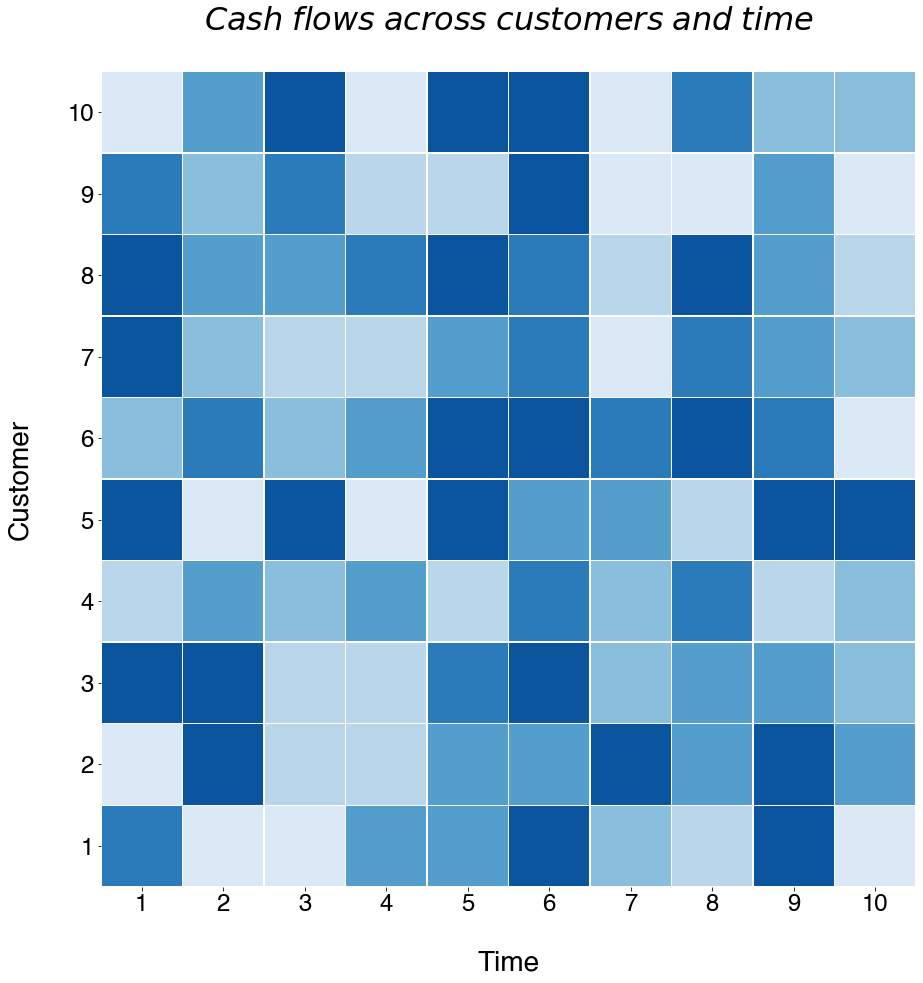

In [12]:
# create heatmap illustrating double sum of cash flows over customers and time
import seaborn as sns
import numpy.random as npr

fig, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(2, 0, n=2, as_cmap=True)
ax = sns.heatmap(npr.rand(11, 11), 
                 cmap=sns.color_palette("Blues"), 
                 annot_kws={"fontsize":18},
                 square=True, 
                 linewidths=.5, 
                 cbar=False)
plt.setp(ax.get_xticklabels(), rotation=0, ha='center', fontsize=24, fontname='Helvetica')
plt.setp(ax.get_yticklabels(), rotation=0, ha='right', fontsize=24, fontname='Helvetica')
plt.xlabel('\nTime', fontsize=28, fontname='Helvetica')
plt.ylabel('Customer\n', fontsize=28, fontname='Helvetica')
plt.xlim(1,11)
plt.ylim(1,11)
# ax.invert_yaxis()
ax.set_facecolor([1,1,1])
ax.set_title('$Cash$ $flows$ $across$ $customers$ $and$ $time$\n', fontsize=32, fontname='Helvetica')
plt.show()

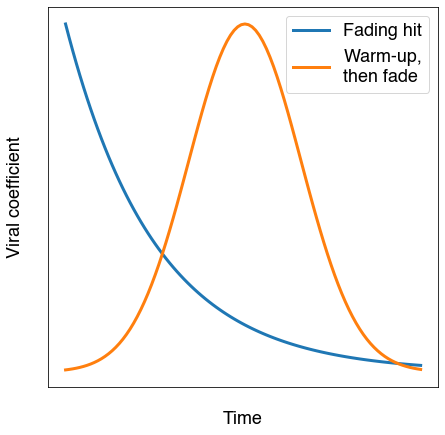

In [212]:
# create plots illustrating changes in viral coefficient over time
fig, axes = plt.subplots(1, 1, figsize = (7,7))
x = np.arange(0,100,1)
y1 = 2*np.exp(-x/25)
y2 = (2/1)*np.exp(-0.1*((x-50)/7)**2)
plt.plot(x, y1, linewidth=3, label='Fading hit')
plt.plot(x, y2, linewidth=3, label='Warm-up,\nthen fade')
plt.xlabel('\nTime', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Viral coefficient\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes.get_xaxis().set_ticks([])
axes.get_yaxis().set_ticks([])
l = plt.legend(prop={'size': 18})
plt.setp(l.texts, family='Helvetica')
plt.show()

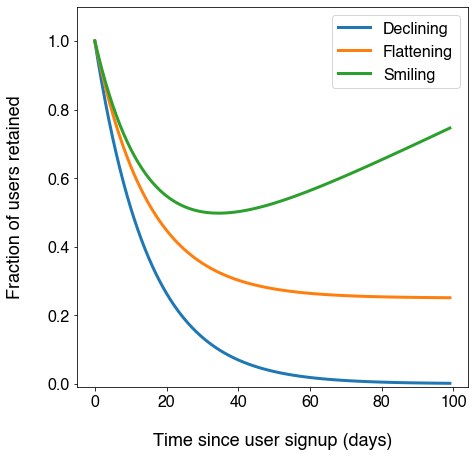

In [241]:
# create retention curve plots
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 1, figsize = (7,7))
x = np.arange(0,100,1)
y1 = 1*np.exp(-x/15)
y2 = 0.75*np.exp(-x/15) + 0.25
y3 = 0.75*np.exp(-x/15) + 0.25 + 0.005*x
plt.plot(x, y1, linewidth=3, label='Declining')
plt.plot(x, y2, linewidth=3, label='Flattening')
plt.plot(x, y3, linewidth=3, label='Smiling')
plt.xlabel('\nTime since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users retained\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylim(-0.01,1.1)
# ax.get_xaxis().set_ticks([0, 28, 56, 84])
ax.tick_params(axis='both', which='major', labelsize=16)
l = plt.legend(prop={'size': 16})
plt.setp(l.texts, family='Helvetica')
plt.show()

In [260]:
# y4 = (y1 + y2 + y3)/3
y4 = np.zeros(100)
y4[:60] = (y1[:60] + y2[:60] + y3)/3
y4[60:80] = (y1[60:80] + y2[60:80])/2
y4[80:] = y1[80:]
# y4

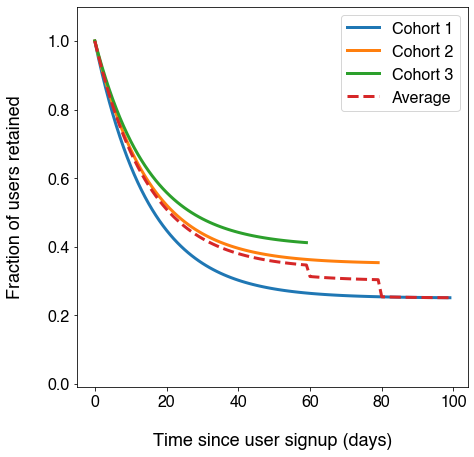

In [261]:
# create improving retention with cohort plots
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 1, figsize = (7,7))
x = np.arange(0,100,1)
y1 = 0.75*np.exp(-x/15) + 0.25
y2 = 0.65*np.exp(-x[:80]/15) + 0.35
y3 = 0.60*np.exp(-x[:60]/15) + 0.40
plt.plot(x, y1, linewidth=3, label='Cohort 1')
plt.plot(x[:80], y2, linewidth=3, label='Cohort 2')
plt.plot(x[:60], y3, linewidth=3, label='Cohort 3')
plt.plot(x, y4, '--', linewidth=3, label='Average')
plt.xlabel('\nTime since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users retained\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylim(-0.01,1.1)
ax.tick_params(axis='both', which='major', labelsize=16)
l = plt.legend(prop={'size': 16})
plt.setp(l.texts, family='Helvetica')
plt.show()

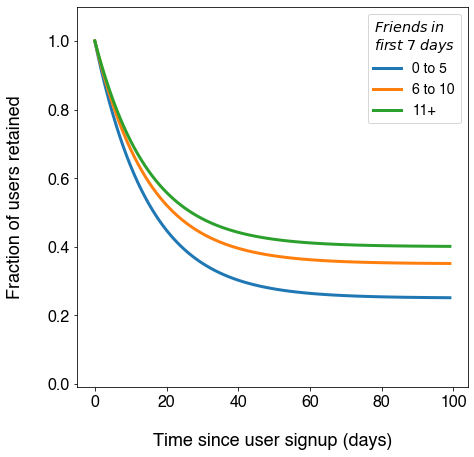

In [273]:
# create improving retention with increasing friends plots
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 1, figsize = (7,7))
x = np.arange(0,100,1)
y1 = 0.75*np.exp(-x/15) + 0.25
y2 = 0.65*np.exp(-x/15) + 0.35
y3 = 0.60*np.exp(-x/15) + 0.40
plt.plot(x, y1, linewidth=3, label='0 to 5')
plt.plot(x, y2, linewidth=3, label='6 to 10')
plt.plot(x, y3, linewidth=3, label='11+')
plt.xlabel('\nTime since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users retained\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylim(-0.01,1.1)
ax.tick_params(axis='both', which='major', labelsize=16)
l = plt.legend(title='$Friends$ $in$ \n$first$ $7$ $days$', prop={'size': 14})
plt.setp(l.get_title(),fontsize='x-large', fontname='Helvetica')
plt.setp(l.texts, family='Helvetica')
plt.show()

New users at time $t$ is equal to product of new users and viral coefficient divided by cycle time from previous time interval plus "free" users who discover product independently: <br>
$U_{new,\space t} = U_{new,\space t - c(t)} \times k_{t} + U_{free}$
<br><br>
Total active users at time $t$ is equal to active users from previous interval plus product of previous interval's new users and retention rate:
<br>
$U_{active,\space t} = U_{active,\space t-1} + U_{new,\space t-1} \times r_{t-1}$
<br><br>
Total lost users at time $t$ is equal to lost users from previous interval plus product of previous interval's new users and churn rate:
<br>
$U_{lost,\space t} = U_{lost,\space t-1} + U_{new,\space t-1} \times (1 - r_{t-1})$